# Dominant pole approximation

In this page, we show how to determine the dominant pole approximation of a third-order system having a real pole ($s=-\gamma$) and two complex-conjugate ones ($s = -\alpha \pm i \beta$). Let this higher order system be

$$
G(s) = \frac{\mu}{(s + \gamma)(s+ \alpha + i \beta)(s + \alpha - i \beta)}
$$

We assume that all the poles are on the left-hand side ($\alpha >0$, $\gamma > 0$).

According to the page {ref}`ref:lec1:useful_formulas`, we need to check whether $\gamma < \sqrt{\alpha^2 + \beta^2}$ or $\gamma > \sqrt{\alpha^2 + \beta^2}$. 

### Case 1: The real pole is dominant

If $\gamma < \sqrt{\alpha^2 + \beta^2}$, the real pole is dominant because its closer to the origin. In this case, we can obtain the dominant pole approximation by replacing $s=0$ into the complex conjugate poles

$$
\boxed{\tilde{G}_1(s)} = \frac{\mu}{s + \gamma} \cdot \frac{1}{\alpha^2 + \beta^2} = \boxed{\frac{\tilde{\mu}_1}{s + \gamma}} \quad \text{ where } \tilde{\mu}_1 = \frac{\mu}{\alpha^2 + \beta^2}
$$

The adjustment of $\mu$ to $\tilde{\mu}_1$ makes the static gain of $\tilde{G}_1(s)$ the same as that of $G(s)$.

### Case 2: The complex-conjugate poles are dominant
If $\gamma > \sqrt{\alpha^2 + \beta^2}$, the complex-conjugate poles are dominant as they are closer to the origin (they have a smaller modulus). In this case, we can obtain the dominant pole approximation by replacing $s=0$ into the real pole

$$
\boxed{\tilde{G}_2(s)} = \frac{\mu}{(s+ \alpha + i \beta)(s + \alpha - i \beta)} \cdot \frac{1}{\gamma} = \frac{\tilde{\mu}_2}{ (s+ \alpha + i \beta)(s + \alpha - i \beta)} =  \boxed{\frac{\tilde{\mu}_2}{s^2 + b s + c}}
$$

where:

- $\tilde{\mu}_2 = \frac{\mu}{\gamma}$ adjusts the static gain of $\tilde{G}_2(s)$ to make it identical to that of $G(s)$
- $b = 2 \alpha $
- $c = \alpha^2 + \beta^2$ 

## Exploratory example

Below these approximations are reported for a system with the specified values of $\alpha$, $\beta$, and $\gamma$, while $\mu$ is computed so that the static gain of $G(s)$ is $1$ for  ease of visualization.

```{admonition} Try out
:class: tip

Open this page in Binder and try to change the values of $\alpha$, $\beta$, and $\gamma$, and reflect on the following points:

- What is the dominant pole in this case? 
- Does the Bode plot of the dominant pole approximation resemble that of $G(s)$? 
- In your specific case, do the impulse and step response look better for $G_1(s)$ or $G_2(s)$? 
- Is the settling time accurate?
```

```{admonition} Note
:class: danger

The dominant pole approximation is usually good if $\gamma$ is at least $5 \div 10$ smaller/larger than $\sqrt{\alpha^2 + \beta^2}$. In this case, the poles are well separated and the approximation becomes more accurate!
```

In [60]:
% Real pole is s = - gamma
gamma = 5; % gamma > 0
% Complex conjugate poles are s = -alpha + i beta
alpha = 2; % alpha > 0
beta = 20; % beta > 0

In [61]:
assert (gamma > 0, 'gamma must be positive');
assert (alpha > 0, 'alpha must be positive');
assert (beta > 0, 'beta must be positive');
set(groot, 'DefaultLineLineWidth', 1.5);

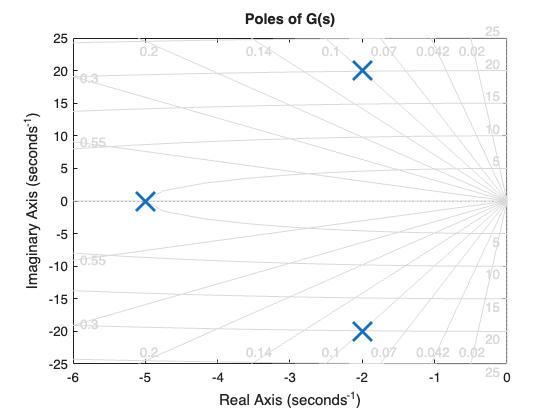

In [ ]:
s = tf('s');
G = gamma * (alpha^2 + beta^2) / ((s + gamma)* (s^2 + 2 * alpha * s + alpha^2 + beta^2));
G1 = gamma / (s + gamma);
G2 = (alpha^2 + beta^2) / (s^2 + 2 * alpha * s + alpha^2 + beta^2);

figure; 
pzmap(G); grid on; 

if exist('OCTAVE_VERSION', 'builtin') == 0
    % MATLAB-specific plot settings
    set(get(gca, 'Responses'), 'MarkerSize', 20, 'LineWidth', 2); % Set pole marker size
end
title('Poles of G(s)');

**What is the dominant pole?**

In [63]:
if gamma < sqrt(alpha^2 + beta^2)
    str = sprintf('Dominant pole: s = -%.2f. G1(s) is the dominant pole approximation of G(s).', gamma);
    style_g1 = 'r-';
    style_g2 = 'b:';
else
    str = sprintf('Dominant poles: s = -%.2f +/- i %.2f. G2(s) is the dominant pole approximation of G(s).', alpha, beta);
    style_g1 = 'r:';
    style_g2 = 'b-';
end
fprintf(str);

Dominant pole: s = -5.00. G1(s) is the dominant pole approximation of G(s).

**Bode plots comparison**

In [ ]:
% Download bodeplot_universal, identical to `bodeplot` but supporting Octave
fprintf('\n');
if ~exist('bodeplot_universal')
    urlwrite('https://raw.githubusercontent.com/bonassifabio/1RT485/refs/heads/main/book/res/matlab/bodeplot_universal.m', 'bodeplot_universal.m');
end

Unrecognized function or variable 'fprint'.

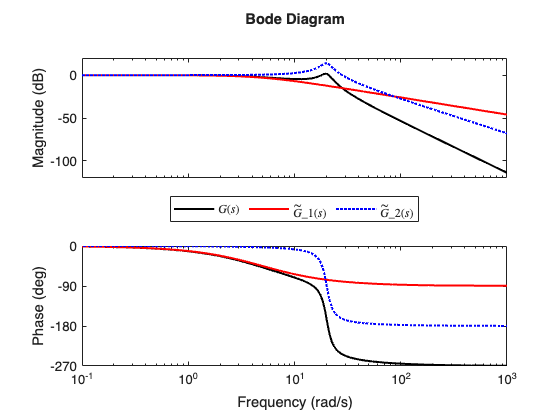

In [65]:
figure;
bodeplot_universal(G, 'k-', G1, style_g1, G2, style_g2);
legend('$G(s)$', '$\tilde{G}_1(s)$', '$\tilde{G}_2(s)$', 'Interpreter', 'latex', 'Location', 'southoutside', 'Orientation', 'horizontal');

**Step and impulse response comparison**

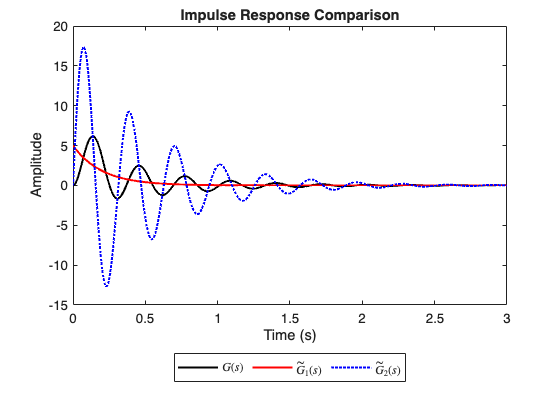

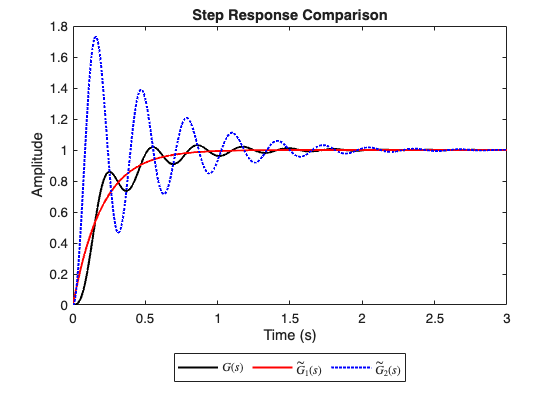

In [66]:
T_end = 6 / min(gamma, alpha);
t = 0:1e-4:T_end;
[y, ~] = impulse(G, t);
[y1, ~] = impulse(G1, t);
[y2, ~] = impulse(G2, t);
figure; hold on; box on;
title('Impulse Response Comparison');
plot(t, y, "k-");
plot(t, y1, style_g1);
plot(t, y2, style_g2);
legend('$G(s)$', '$\tilde{G}_1(s)$', '$\tilde{G}_2(s)$', 'Interpreter', 'latex', 'Location', 'southoutside', 'Orientation', 'horizontal');
xlabel('Time (s)');
ylabel('Amplitude');

[y, ~] = step(G, t);
[y1, ~] = step(G1, t);
[y2, ~] = step(G2, t);
figure; hold on; box on;
title('Step Response Comparison');
plot(t, y, "k-");
plot(t, y1, style_g1);
plot(t, y2, style_g2);
legend('$G(s)$', '$\tilde{G}_1(s)$', '$\tilde{G}_2(s)$', 'Interpreter', 'latex', 'Location', 'southoutside', 'Orientation', 'horizontal');
xlabel('Time (s)');
ylabel('Amplitude');

**Settling time estimation**
For $G(s)$, the settling time is estimated as the value of $t$ permanently enters the interval $[0.99, 1.01]$. For $\tilde{G}_1(s)$ and $\tilde{G}_2(s)$, the settling time is approximated with the formula $T_{99\%} = \frac{5}{\gamma}$ and  $T_{99\%} = \frac{5}{\alpha}$, respectively (see {ref}`ref:lec1:useful_formulas`).

In [ ]:
idx = max(find(y < 0.99, 1, 'last'), find(y > 1.01, 1, 'last'));
T_G = t(idx);
T_G1 = 5 / gamma;
T_G2 = 5 / alpha;

str = sprintf('\nSettling time (99%%):\n\tof G(s): %.2f sec\n\tof G1(s): %.2f sec\n\tof G2(s): %.2f sec\n', T_G, T_G1, T_G2);
fprintf(str);

Settling time (99%)
	of G(s): 1.51 sec
	of G1(s): 1.00 sec
	of G2(s): 2.50 sec
